# COGS 108 - Final Project 

# Overview

This project is about finding the relationship between area of best school and area of worst school in NC. From the data analysis, area of best school has higher ranking in both restaurant inspection grades and yelp ratings.

# Name & PID

- Name: Doyoung Kim
- PID: A91104042

# Research Question

Do restaurants near UNC have higher ratings (both quality and hygiene) than restaurants near Fayetteville State University because UNC is the best school in NC and Fayetteville State University is the worst? I think UNC will have better scores in general because area of higher school ranking will care more about their reputation.

# Background and Prior Work 

Thanks to current situation, health is the number one priority right now. One of the most imporant factor that contributes to personal health is eating better food. However, it is difficult to get variety of food from home cooking. Not every ingredients are available. Therefore, we order food online or go pick up from restaurants. Before, we only focused on food ratings, but now we also need to consider cleanliness of restaurants. Then, I became curious about the relationship between college ratings, food hygiene and food rating. Because the given dataset is about NC, I searched for the best college and the worst (Reference #1 & #2) to compare. From the glimpse of the inspection dataset and Yelp dataset, the scores for food insepction are high already, but the food ratings vary a lot. This discrepancy piqued my interest. 

References (include links):
- 1) https://moneyinc.com/worst-colleges-in-america/ : Best college in NC is UNC
- 2) https://www.bestcolleges.com/features/best-colleges-in-north-carolina/ : Worst college in NC is Fayetteville State University
- 3) https://www.usgs.gov/faqs/how-much-distance-does-a-degree-minute-and-second-cover-your-maps?qt-news_science_products=0#qt-news_science_products

# Hypothesis


The restaurants near UNC will have higher rankings compare to restaurants near Fayetteville State University. 

# Dataset(s)


- 1) Longitude and latitude information of UNC 
    - Link to the dataset: https://www.google.com/maps/
    - Google map gives information about longitude and latitude of places

- 2) Longitude and latitude information of Fayetteville State University
    - Link to the dataset: https://www.google.com/maps/
    - Google map gives information about longitude and latitude of places

- 3) Inspections
    - Link to the dataset: Given
    - It includes the hsisid, locations, type of facility, scores, and violations information about each store
    - 18466 x 36 
    
- 4) Yelp
    - Linkt to the dataset: Given
    - It includes the name of the restuarnt, location, types of food that each store sells, ratings, opened or closed.
    - 3688 x 31
        
I used longitutde and latitude to filter through datas as ids are not used between two datasets and names cannot be used for privacy issues. 

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pylab import plot, show, savefig, xlim, figure, hold, ylim, legend, boxplot, setp, axes
import warnings
warnings.filterwarnings('ignore')

yelp_df = pd.read_csv("yelp.csv")
inspection_df = pd.read_csv("inspections.csv")

UNC_Y = 35.9049165
UNC_X = -79.0491021
FSU_Y = 35.074225
FSU_X = -78.8946783
UNC_zip = 27599
FSU_zip = 28301


# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# Clean Yelp Data
# Drop irrelevent columns
yelp_df.drop(yelp_df.columns[9:], axis = 1, inplace = True)
yelp_df.drop(yelp_df.columns[[0,1, 4, 5, 6]], axis = 1, inplace = True)
yelp_df.drop(yelp_df[yelp_df['is_closed'] == True].index, inplace = True)

# Change column names
yelp_df = yelp_df.rename(columns={'latitude': 'y', 'longitude': 'x'})

yelp_df.head(5)


,is_closed,rating,y,x
0,False,2.5,35.873808,-78.790896
1,False,4.0,35.802840,-78.785930
2,False,5.0,35.839681,-78.678791
3,False,3.0,35.743170,-77.964160
4,False,3.5,35.762936,-77.999428


In [3]:
# Clean Inspection Data
# Keep only relevant columns and only restuarants, not school lunch rooms
inspection_df = inspection_df.filter(['facilitytype', 'x', 'y', 'score', 'num_critical', 'num_non_critical', 'critical'])
inspection_df.drop(inspection_df[inspection_df.facilitytype != 'Restaurant'].index, inplace = True)
inspection_df.head(5)

,facilitytype,x,y,score,num_critical,num_non_critical,critical
0,Restaurant,-78.587963,35.783914,96.0,9,7,1
1,Restaurant,-78.549673,35.791986,98.0,0,11,0
2,Restaurant,-78.547960,35.723125,97.0,4,8,1
3,Restaurant,-78.815727,35.799249,99.0,2,3,1
6,Restaurant,-78.695656,35.766739,96.0,6,7,1


In [4]:
# Funtion to change DD to DMS longitude and latitude
# changing from decimal to decimal minute second format
def change_DD_to_DMS_only_M (DD):
    degree = int(DD) # just get the decimal part
    minuet = ((DD-degree)*60)
    return minuet


In [5]:
yelp_df['yelp_x'] = yelp_df['x'].apply(change_DD_to_DMS_only_M)
yelp_df['yelp_y'] = yelp_df['y'].apply(change_DD_to_DMS_only_M)
inspection_df['inspect_x'] = inspection_df['x'].apply(change_DD_to_DMS_only_M)
inspection_df['inspect_y'] = inspection_df['y'].apply(change_DD_to_DMS_only_M)
UNC_x = change_DD_to_DMS_only_M(UNC_X)
UNC_y = change_DD_to_DMS_only_M(UNC_Y)
FSU_x = change_DD_to_DMS_only_M(FSU_X)
FSU_y = change_DD_to_DMS_only_M(FSU_Y)



# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [6]:
# Filter through dataset that does not belong in same zipcode as either UNC or FSU
# inspection_filtered_1 = inspection_df[(inspection_df['zip'] == FSU_zip)]
# inspection_filtered_2 = inspection_df[(inspection_df['zip'] == UNC_zip)]
# yelp_filtered_1 = yelp_df[(yelp_df['zip_code'] == FSU_zip)]
# yelp_filtered_2 = yelp_df[(yelp_df['zip_code'] == UNC_zip)]

# But, there are not matching rows with exact zipcode.
# Try, longitude and latitude

#FSU
yelp_filtered_FSU = yelp_df[(yelp_df['x'] < (FSU_X + 0.1)) & (yelp_df['x'] > (FSU_X -0.1))]
yelp_filtered_FSU = yelp_filtered_FSU[(yelp_filtered_FSU['y'] < (FSU_Y + 0.1)) & (yelp_filtered_FSU['y'] > (FSU_Y -0.1))]
inspection_filtered_FSU = inspection_df[(inspection_df['x'] < (FSU_X + 0.5)) & (inspection_df['x'] > (FSU_X - 0.5))]
inspection_filtered_FSU = inspection_filtered_FSU[(inspection_filtered_FSU['y'] < (FSU_Y + 0.5)) & 
                                                  (inspection_filtered_FSU['y'] > (FSU_Y - 0.5))]

#UNC
yelp_filtered_UNC = yelp_df[(yelp_df['x'] < (UNC_X + 0.1)) & (yelp_df['x'] > (UNC_X -0.1))]
yelp_filtered_UNC = yelp_filtered_UNC[(yelp_filtered_UNC['y'] < (UNC_Y + 0.1)) & (yelp_filtered_UNC['y'] > (UNC_Y -0.1))]
inspection_filtered_UNC = inspection_df[(inspection_df['x'] < (UNC_X + 0.5)) & (inspection_df['x'] > (UNC_X - 0.5))]
inspection_filtered_UNC = inspection_filtered_UNC[(inspection_filtered_UNC['y'] < (UNC_Y + 0.5)) & 
                                                  (inspection_filtered_UNC['y'] > (UNC_Y - 0.5))]

In [7]:
# Check size of filtered data
print(yelp_filtered_FSU.shape)
print(inspection_filtered_FSU.shape)
print(inspection_filtered_UNC.shape)
print(yelp_filtered_UNC.shape)

(8, 6)
(11, 9)
(10563, 9)
(110, 6)


,facilitytype,x,y,score,num_critical,num_non_critical,critical,inspect_x,inspect_y
1577,Restaurant,-78.807038,35.556502,96.0,3,7,1,-48.42228,33.39012
5958,Restaurant,-78.807038,35.556502,98.5,5,2,1,-48.42228,33.39012
6264,Restaurant,-78.747986,35.539550,94.0,6,4,1,-44.87916,32.37300
7918,Restaurant,-78.747986,35.539550,92.0,10,4,1,-44.87916,32.37300
9029,Restaurant,-78.807038,35.556502,94.0,5,5,1,-48.42228,33.39012
11103,Restaurant,-78.747986,35.539550,93.0,8,6,1,-44.87916,32.37300
12955,Restaurant,-78.807038,35.556502,92.5,8,6,1,-48.42228,33.39012
13823,Restaurant,-78.747986,35.539550,94.5,8,7,1,-44.87916,32.37300
15588,Restaurant,-78.747986,35.539550,97.5,2,3,1,-44.87916,32.37300
16513,Restaurant,-78.807038,35.556502,92.5,5,6,1,-48.42228,33.39012


## Data Visualization

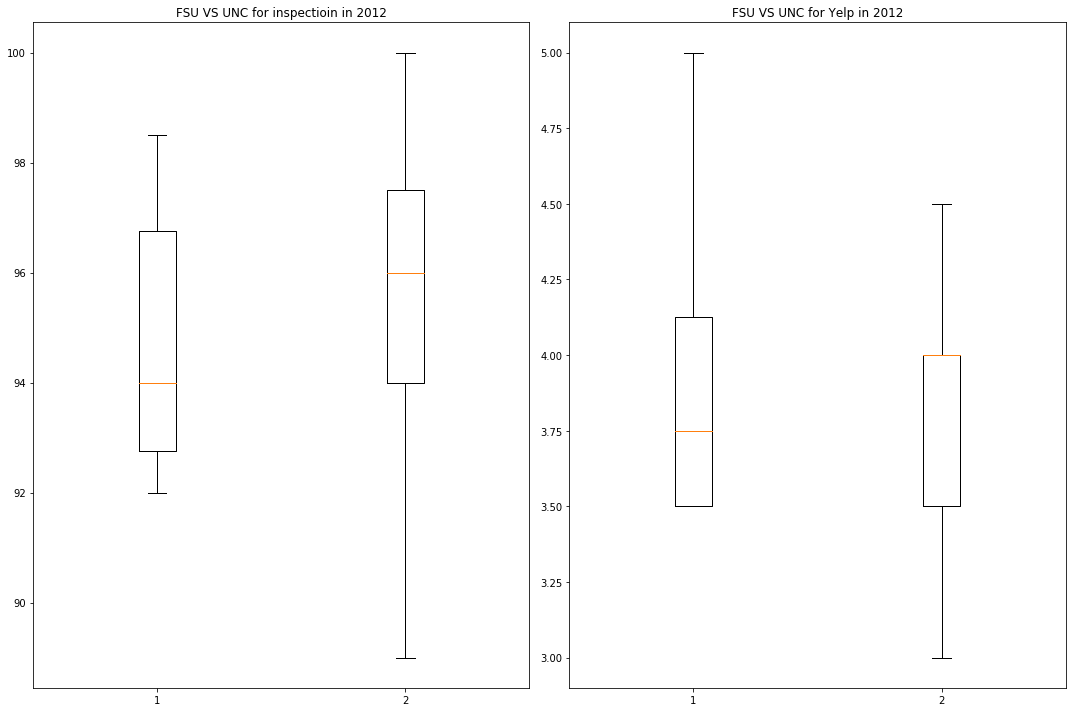

In [24]:
# Concat dataframes to Boxplot the points for Inspection data
inspection_frame = [inspection_filtered_FSU.score, inspection_filtered_UNC.score]
yelp_frame = [yelp_filtered_FSU.rating, yelp_filtered_UNC.rating]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].boxplot(inspection_frame, showfliers=False)
axes[0].set_title('FSU VS UNC for inspectioin in 2012' )
axes[1].boxplot(yelp_frame, showfliers=False)
axes[1].set_title('FSU VS UNC for Yelp in 2012' )
fig.tight_layout()


# Ethics & Privacy

- 1) The information regarding restaurant inspection and school is public
    - 1) All of the names and addresses of schools in NC can be found online
    - 2) Health inspection records are public - can be seen at the restaurant or online 
- 2) The private information needs to be removed 
    - 1) Although health inspection records are public, private information such as name needs to be protected to  illiminate any possible damage to a specific restaurant 
    - 2) Information displayed inside of restaurants do not include minor violations
    - 3) Restaurants with minor violations can still get grade A
    - 4) Looking at longitude and latitude cannot give idea of location simply
    - 5) Zipcodes are erased
    - 6) Anything that can relate to inspection rating is erased such as inspector name
- 3) The definition of near needs to be addressed as 11 Km for yelp and 55 Km for inspection
    - 1) Close could mean 1 mile to 10 miles depending on people. The result of this project can harm restaurants that are not in the range if the finding says restaurants near UCSD have lower ratings in general
    - 2) It may also influence parents of potential students for UCSD. If students do not have cars, then they will eat from nearby restaurants. Food is an important factor to consider for choosing school.
- 4) The source of inspection record needs to be meantioned
    - 1) The readers may question source of information for credibility or privacy violation like Facebook case
    - 2) The inspection record is given
- 5) The length of inspection record needs to be meantioned
    - 1) This record is from 2012

# Conclusion & Discussion

From the boxplots, it is clear that areas near UNC have higher number in both restaurant inspection and yelp rating. However, inspection rating is not that far away from each other. One possible explaination is that he inspection occurs every year at least, so restaurant owners need to keep it up to continue the operation. However, this analysis have lots of limitations. First of all, the dataset did not have enough observation to match zipcodes. Zipcodes are first filters to use for geographic analysis, but none of them matched both yelp dataset and inspection dataset. Thus, functions and codes to try filter with zipcodes are now commented out. Because of this lack of observation, the definition of 'near' is different. Yelp dataset had enough observations to close it down to 11 Km, but inspection dataset did not have. Therefore, the radius became 55 Km. This analysis includes only one pair of colleges, UNC and Fayetteville State University, so the conclusion cannot be used for general NC area.  The dataset is taken from 2012, so it may have differences from most recent data. 